### Solución de la ecuación de onda para una membrana circular

In [180]:
import numpy as np
import scipy.special as sp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

plt.style.use('bmh')

La ecuación diferencial parcial para una onda bidimensional en coordenadas polares es
$$
\frac{\partial^2 \psi}{\partial r^2} + \frac{1}{r} \frac{\partial \psi}{\partial r} + \frac{1}{r^2} \frac{\partial^2 \psi}{\partial \varphi^2} = \frac{1}{v^2} \frac{\partial^2 \psi}{\partial t^2}.
$$

Si queremos soluciones finitas para todo $r$ y $t$. Además de tener el borde $r = a$ de la membrana fijo, es decir,  
$$
\psi(a,\phi,t) = 0, \quad \forall t,\phi.
$$

La solución está dada por
$$
\psi(r,\phi,t) = \sum_{m = -\infty}^{\infty} \sum_{n=1}^{\infty} \psi_{mn}(r,\phi,t),
$$
donde los modos de vibración $\psi_{mn}(r,\phi,t)$ están dados por
$$
\psi_{mn}(r,\phi,t) = J_{m} \left(\frac{\alpha_{m,n}}{a} r \right) e^{im\phi} \left[A_{mn} \cos(\omega t) + B_{mn} \sin(\omega t) \right], \quad 0 \leq r \leq a, \quad t \geq 0,
$$
con $\alpha_{m,n}$ el $n$-ésimo cero de la función de Bessel $J_{m}$, $\omega = \alpha_{m,n} v/a$ y constantes $A_{mn}$, $B_{mn}$ fijadas por las condiciones de borde $\psi(r,\phi,0)$ y $\partial\psi(r,\phi,0)/\partial t$.

Introduciendo las variables adimensionales $x := r/a$ y $\tilde{t} := vt/a$, obtenemos que
$$
\tilde{\psi}_{mn}(x,\phi,\tilde{t}) = J_{m} \left(\alpha_{m,n} x \right) e^{im\phi} \left[A_{mn} \cos(\alpha_{m,n} \tilde{t}) + B_{mn} \sin(\alpha_{m,n} \tilde{t}) \right], \quad 0 \leq x \leq 1, \quad \tilde{t} \geq 0.
$$


In [181]:
#Definición del modo de vibración m,n (parte real):
def psi_mn(x,phi,t,m,n):
    A = 1.0
    B = 1.0
    zeros = sp.jn_zeros(m,n)[-1]
    real_exp = np.exp(1j*m*phi)

    psi = sp.jv(m,zeros*x)*real_exp.real*(A*np.cos(zeros*t) + B*np.sin(zeros*t))
        
    return psi

In [182]:
#Disco de radio x = 1:
x = np.linspace(0,1,300)
ph = np.linspace(0,2.*np.pi,300)

X,PHI = np.meshgrid(x,ph)

X_1 = X*np.cos(PHI)       #Dominio en x
Y_1 = X*np.sin(PHI)       #Dominio en y

#Paso temporal:
t = np.linspace(0,3,100)

In [183]:
#Animación del modo de vibración:
import matplotlib.animation as animation

In [184]:
#Función que actualiza los frames:
def update(i,t,lim,m,n):
    ax.clear()     #Clear axis

    Z_1 = psi_mn(X,PHI,t[i],m,n)

    ax.set_title(r"$\rm{Modo \ de \ vibración} \ \psi_{mn} \ \rm{para}\ m = $"+str(m)+r" $\rm{y} \ n = $"+str(n),fontsize=12,y=1)
    ax.plot_surface(X_1, Y_1, Z_1, rstride=1, cstride=1, cmap=plt.cm.jet) 
    ax.set_xlim(-1.1,1.1)
    ax.set_ylim(-1.1,1.1)
    ax.set_zlim(-lim,lim)
    ax.set_axis_off()

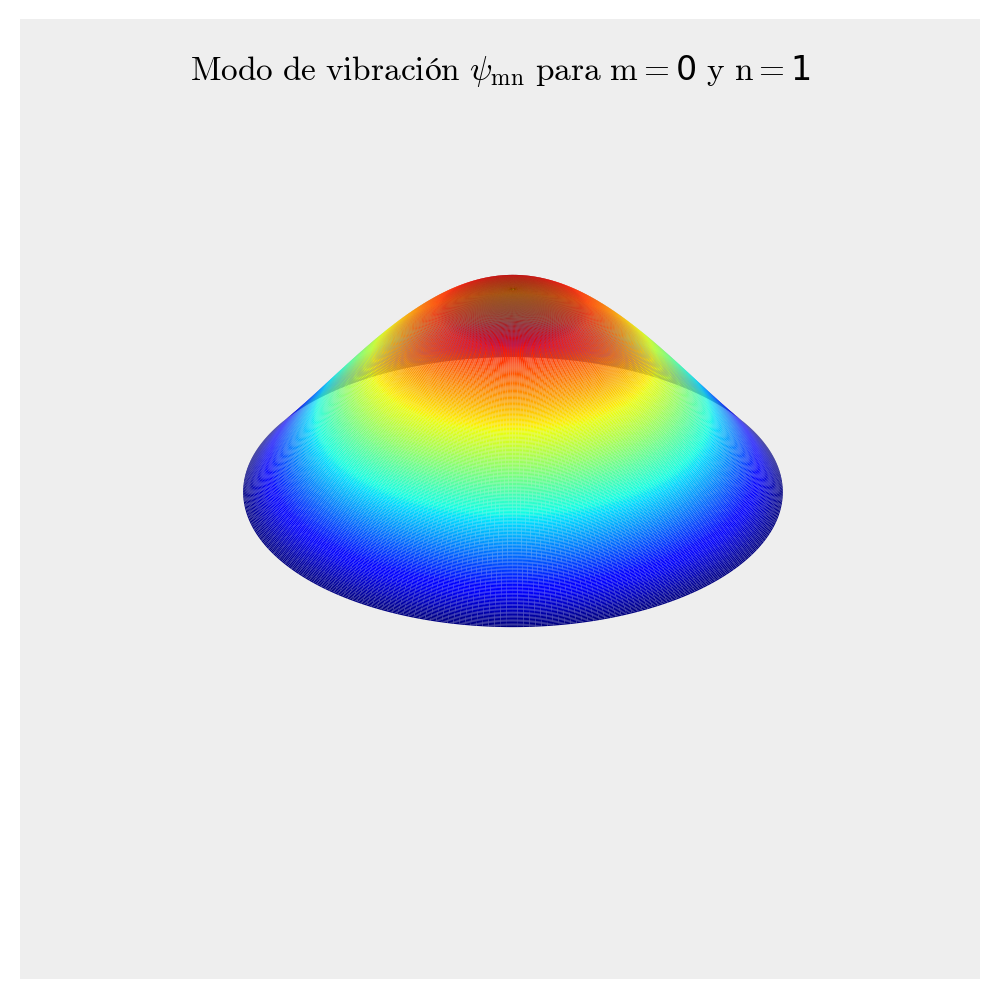

In [185]:
#Creación de la figura y ejes que contienen la animación:
fig = plt.figure(dpi=200)
fig.subplots_adjust(0,0,1,1)
ax = fig.add_subplot(projection = '3d')

m,n = 0,1
lim = np.max(psi_mn(X,PHI,0.0,m,n))

anim = animation.FuncAnimation(fig, func = update, fargs = (t,lim,m,n,), frames = len(t), interval = 1)
anim.save('Modo-m='+str(m)+'-y-n='+str(n)+'.gif',savefig_kwargs={"transparent": True})